In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Input, Embedding, Concatenate, Flatten
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("ratings.csv")

In [4]:
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
8851792,61168,328,3.5,1170493209
8851793,61168,329,3.0,1170430170
8851794,61168,332,2.5,1170491743
8851795,61168,338,2.0,1171624940


In [5]:
df.userId = pd.Categorical(df.userId)
df["new_user_id"] = df.userId.cat.codes

In [6]:
df.movieId = pd.Categorical(df.movieId)
df["new_movie_id"] = df.movieId.cat.codes

In [7]:
userIds = df["new_user_id"].values
movieIds = df["new_movie_id"].values
ratings = df["rating"].values

In [8]:
n_train = int(0.75 * len(ratings))

In [9]:
n_train

6638847

In [10]:
unique_users = len(set(userIds))
unique_movies = len(set(movieIds))

In [11]:
i_user = Input((1,))
i_movie = Input((1,))

users_emb = Embedding(unique_users,15)(i_user)
movies_emb = Embedding(unique_movies,15)(i_movie)

users_emb = Flatten()(users_emb)
movies_emb = Flatten()(movies_emb)

x = Concatenate()([users_emb,movies_emb])

x = Dense(1024, activation="relu")(x)
x= Dense(1)(x)


model = Model(inputs = [i_user,i_movie], outputs = x)


model.compile(loss="mse",optimizer = "sgd")

In [12]:
userIds, movieIds, ratings = shuffle(userIds,movieIds, ratings)

In [13]:
userIds_train =userIds[:n_train]
userIds_test=userIds[n_train:]

movieIds_train=movieIds[:n_train]
movieIds_test=movieIds[n_train:]

ratings_train=ratings[:n_train]
ratings_test=ratings[n_train:]


In [15]:
r = model.fit(
    x=[userIds_train,movieIds_train],y= ratings_train,
    epochs = 20 ,
    batch_size = 1024,
    validation_data =([userIds_test,movieIds_test],ratings_test),
    verbose =2)

Epoch 1/20
6484/6484 - 45s - loss: 1.0978 - val_loss: 1.0068 - 45s/epoch - 7ms/step
Epoch 2/20
6484/6484 - 28s - loss: 0.9553 - val_loss: 0.9244 - 28s/epoch - 4ms/step
Epoch 3/20
6484/6484 - 28s - loss: 0.9106 - val_loss: 0.8997 - 28s/epoch - 4ms/step
Epoch 4/20
6484/6484 - 27s - loss: 0.8879 - val_loss: 0.8763 - 27s/epoch - 4ms/step
Epoch 5/20
6484/6484 - 28s - loss: 0.8602 - val_loss: 0.8466 - 28s/epoch - 4ms/step
Epoch 6/20
6484/6484 - 28s - loss: 0.8313 - val_loss: 0.8209 - 28s/epoch - 4ms/step
Epoch 7/20
6484/6484 - 26s - loss: 0.8076 - val_loss: 0.8014 - 26s/epoch - 4ms/step
Epoch 8/20
6484/6484 - 27s - loss: 0.7898 - val_loss: 0.7874 - 27s/epoch - 4ms/step
Epoch 9/20
6484/6484 - 27s - loss: 0.7763 - val_loss: 0.7770 - 27s/epoch - 4ms/step
Epoch 10/20
6484/6484 - 26s - loss: 0.7661 - val_loss: 0.7697 - 26s/epoch - 4ms/step
Epoch 11/20
6484/6484 - 26s - loss: 0.7582 - val_loss: 0.7624 - 26s/epoch - 4ms/step
Epoch 12/20
6484/6484 - 26s - loss: 0.7519 - val_loss: 0.7577 - 26s/epoch 

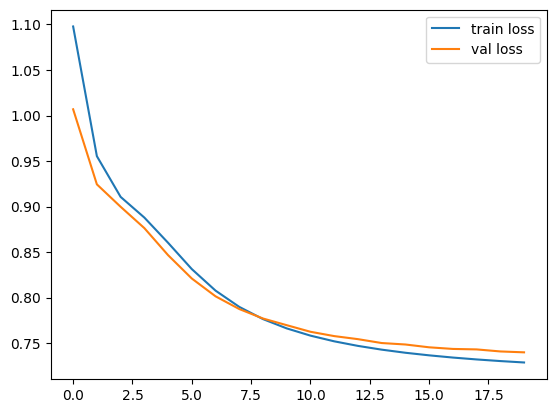

In [16]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()

In [19]:
#SOTA RMSE ACHIEVED
np.sqrt(0.7368)

0.8583705493549973